# Практика

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [3]:
# ваш код тут
# например вот такое распределение
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
# Непрерывная случайная величина Фиска
cos_rv = sts.arcsine()
sample = cos_rv.rvs(100)
sample

array([5.93994418e-01, 9.98569980e-01, 6.89176711e-01, 8.05063942e-01,
       3.60982831e-01, 1.41842868e-04, 5.10224627e-01, 1.27730111e-01,
       4.11564261e-01, 6.89630292e-02, 1.49369953e-05, 2.81369134e-02,
       5.33262314e-02, 4.69892658e-02, 9.87979845e-01, 9.99652616e-01,
       1.89533647e-02, 6.59452336e-01, 8.96480862e-01, 2.06737220e-01,
       9.93724148e-01, 1.52271366e-01, 9.55960504e-01, 2.88132396e-02,
       6.71458653e-01, 9.96461113e-01, 9.59707290e-01, 1.03396078e-02,
       6.08407230e-03, 7.50414849e-01, 2.25371954e-01, 6.18845168e-01,
       7.20245447e-01, 3.55535146e-02, 1.88326560e-03, 4.61531222e-02,
       9.96629130e-01, 5.11546114e-01, 7.38276981e-01, 2.85041701e-01,
       8.35137138e-01, 4.46297773e-02, 2.09174697e-01, 9.58604704e-01,
       2.49819417e-01, 6.78167769e-01, 9.71160284e-01, 2.71195481e-01,
       1.24788956e-01, 4.83721610e-01, 4.22121622e-02, 1.34213021e-01,
       4.02402397e-01, 2.84535695e-02, 4.44134130e-01, 1.78122264e-01,
      

In [4]:
sample.dtype

dtype('float64')

In [5]:
real_mean = cos_rv.mean() # настоящее среднее случайной величины
real_mean

0.5

In [6]:
real_var = cos_rv.var() # настоящая дисперсия случайной величины
real_var

0.125

### Постройте гистограмму выборки и теоретическую плотность распределения

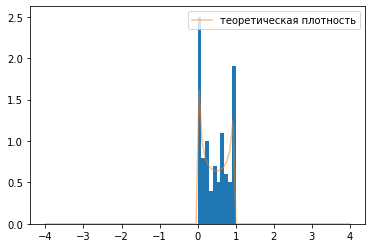

In [7]:
##### ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cos_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [8]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)
sample_std =sample.std()
print(sample_std)

0.46007239461360333
0.12736057486812094
0.3568761337889113


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

0.021567177039475756
0.5371055140427277
0.17021100420763896


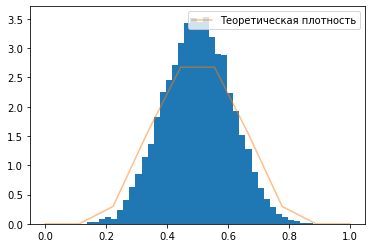

In [11]:
N = 10
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(cos_rv.rvs(N)))
    
real_cos_rv = sts.cosine(loc=cos_rv.mean(), scale=cos_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0,1,10)
pdf = real_cos_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()
real_mean = real_cos_rv.rvs(N).mean() # настоящее среднее случайной величины
real_var = real_cos_rv.rvs(N).var() # настоящая дисперсия случайной величины
real_std = real_cos_rv.rvs(N).std()
print(real_var)
print(real_mean)
print(real_std)

In [12]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(cos_rv.rvs(N)))

0.002038690999219814
0.49054289877969187
0.03592250110106668


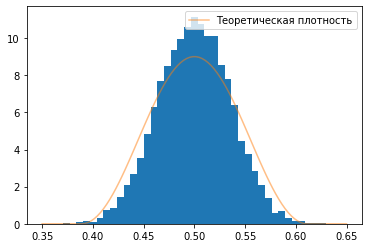

In [16]:
real_cos_rv = sts.cosine(loc=cos_rv.mean(), scale=cos_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0.35,0.65,100)
pdf = real_cos_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()
real_mean = real_cos_rv.rvs(N).mean() # настоящее среднее случайной величины
real_var = real_cos_rv.rvs(N).var() # настоящая дисперсия случайной величины
real_std = real_cos_rv.rvs(N).std()
print(real_var)
print(real_mean)
print(real_std)

In [17]:
N = 1000
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(cos_rv.rvs(N)))

0.0001575570907799909
0.4998707253617335
0.012508496433977336


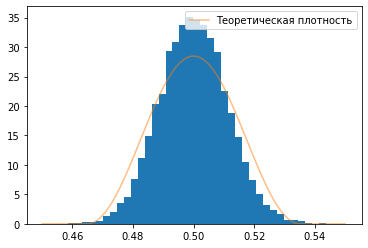

In [20]:
real_cos_rv = sts.cosine(loc=cos_rv.mean(), scale=cos_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0.45,0.55,1000)
pdf = real_cos_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()
real_mean = real_cos_rv.rvs(N).mean() # настоящее среднее случайной величины
real_var = real_cos_rv.rvs(N).var() # настоящая дисперсия случайной величины
real_std = real_cos_rv.rvs(N).std()
print(real_var)
print(real_mean)
print(real_std)

1.5799262812808136e-05
0.5000848146037288
0.003970874860506438


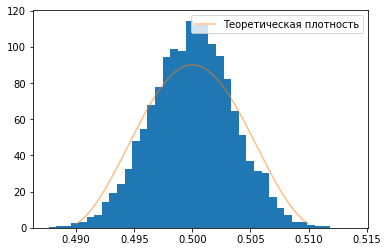

In [24]:
N = 10000
# сгенерируем много выборочных средних
means = []
for i in range(10000):
    means.append(np.mean(cos_rv.rvs(N)))
    
real_cos_rv = sts.cosine(loc=cos_rv.mean(), scale=cos_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(0.49,0.51,10000)
pdf = real_cos_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()
real_mean = real_cos_rv.rvs(N).mean() # настоящее среднее случайной величины
real_var = real_cos_rv.rvs(N).var() # настоящая дисперсия случайной величины
real_std = real_cos_rv.rvs(N).std()
print(real_var)
print(real_mean)
print(real_std)

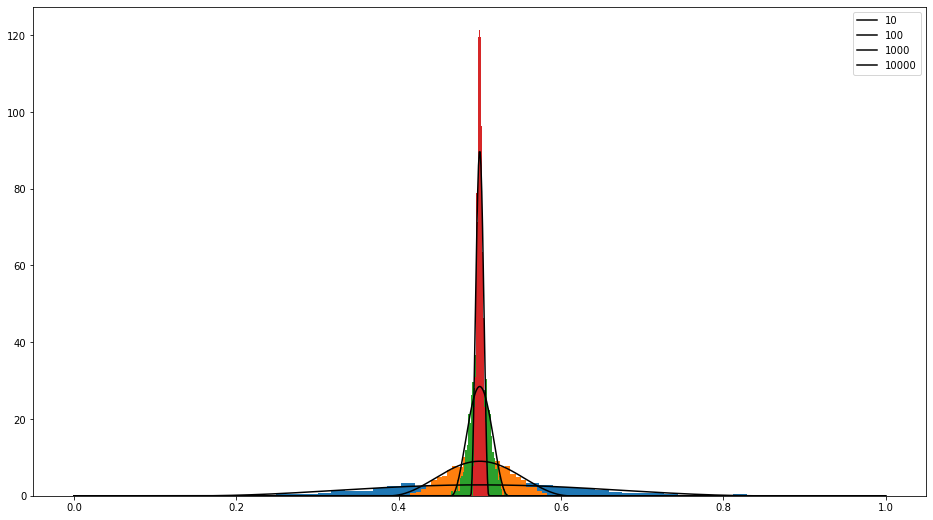

In [26]:
plt.figure(figsize=(16,9))
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(cos_rv.rvs(N)))
    plt.hist(means, density=True, bins=40)
    real_cos_rv = sts.cosine(loc=cos_rv.mean(), scale=cos_rv.std() / np.sqrt(N))    
    x = np.linspace(0,1, 1000)
    pdf = real_cos_rv.pdf(x)
    plt.plot(x, pdf, color = 'black')

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [27]:
# Для выбранного распределения апроксимация распределения выборочного среднего работает плохо.
# Теоритическая плотность не описывает выборку полностью.

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [28]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


(array([1.45469092e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.27345462e-05,
        1.45469092e-04, 1.45469092e-04, 5.81876369e-04, 5.09141823e-04,
        6.54610916e-04, 1.96383275e-03, 2.47297457e-03, 3.34578912e-03,
        7.34618916e-03, 6.90978189e-03, 8.72814554e-03, 1.11283856e-02,
        1.33104220e-02, 1.64380074e-02, 1.77472293e-02, 1.92019202e-02,
        2.34932584e-02, 2.02202038e-02, 1.67289456e-02, 1.62925383e-02,
        1.31649529e-02, 1.26558110e-02, 8.29173826e-03, 6.18243643e-03,
        5.52782551e-03, 3.56399276e-03, 2.03656729e-03, 1.89109820e-03,
        9.45549100e-04, 7.27345462e-05, 3.63672731e-04, 1.45469092e-04]),
 array([  0.   ,   4.125,   8.25 ,  12.375,  16.5  ,  20.625,  24.75 ,
         28.875,  33.   ,  37.125,  41.25 ,  45.375,  49.5  ,  53.625,
         57.75 ,  61.875,  66.   ,  70.125,  74.25 ,  78.375,  82.5  ,
         86.625,  90.75 ,  94.875,  99.   , 103.125, 107.25 , 111

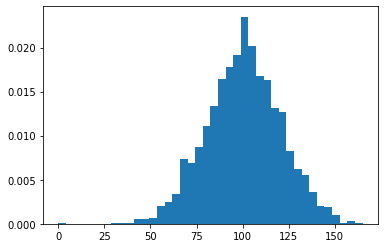

In [29]:
plt.hist(df['total day calls'], density=True, bins=40)

In [30]:
df['total day calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64

In [31]:
df['churn'].describe()

count      3333
unique        2
top       False
freq       2850
Name: churn, dtype: object

In [32]:
df1 = df[df['churn'] == True]['total day calls']
df1.count() / df.shape[0]

0.14491449144914492

In [33]:
df2 = df[df['churn'] == False]['total day calls']
df2.count() / df.shape[0]

0.8550855085508551

In [34]:
alpha = 0.05 ## найдём доверительные интервалы для 95% 
z = sts.norm.ppf(1-alpha/2)
z

1.959963984540054

In [35]:
# churn == True
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(df1) - z * df1.std() / np.sqrt(df1.count()), np.mean(df1) + z * df1.std() / np.sqrt(df1.count()) 
))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df1),  np.std(df1, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.41066229112079, 103.26014516229537] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 


In [36]:
# churn == False
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(df2) - z * df2.std() / np.sqrt(df2.count()), np.mean(df2) + z * df2.std() / np.sqrt(df2.count()) 
))
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df2),  np.std(df2, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.55618833318324, 101.01012745629045] 
Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 


In [37]:
# Сравните результаты.
# ДИ обоих методов практически совпадают

[]

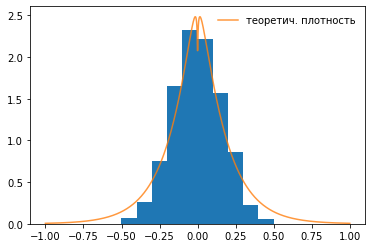

In [38]:
# распределение dgamma: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dgamma.html#scipy.stats.dgamma
a = 1.1
dgamma_rv = sts.dgamma(a)
# Generate random numbers
dgamma_sample = dgamma_rv.rvs(1000)
# dgamma_sample
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(1000):
    means.append(np.mean(dgamma_rv.rvs(N)))

means = np.array(means).astype(np.float32)
real_dgamma_rv = sts.dgamma(a, loc=dgamma_rv.mean(), scale=dgamma_rv.std() / np.sqrt(N))
plt.hist(means, density=True,) # bins=40)
x = np.linspace(-1,1, 1000)
pdf = real_dgamma_rv.pdf(x)
plt.plot(x, pdf, label='теоретич. плотность', alpha=0.8)
plt.legend(loc='upper right', frameon=False)
plt.plot()